# Exercício 18

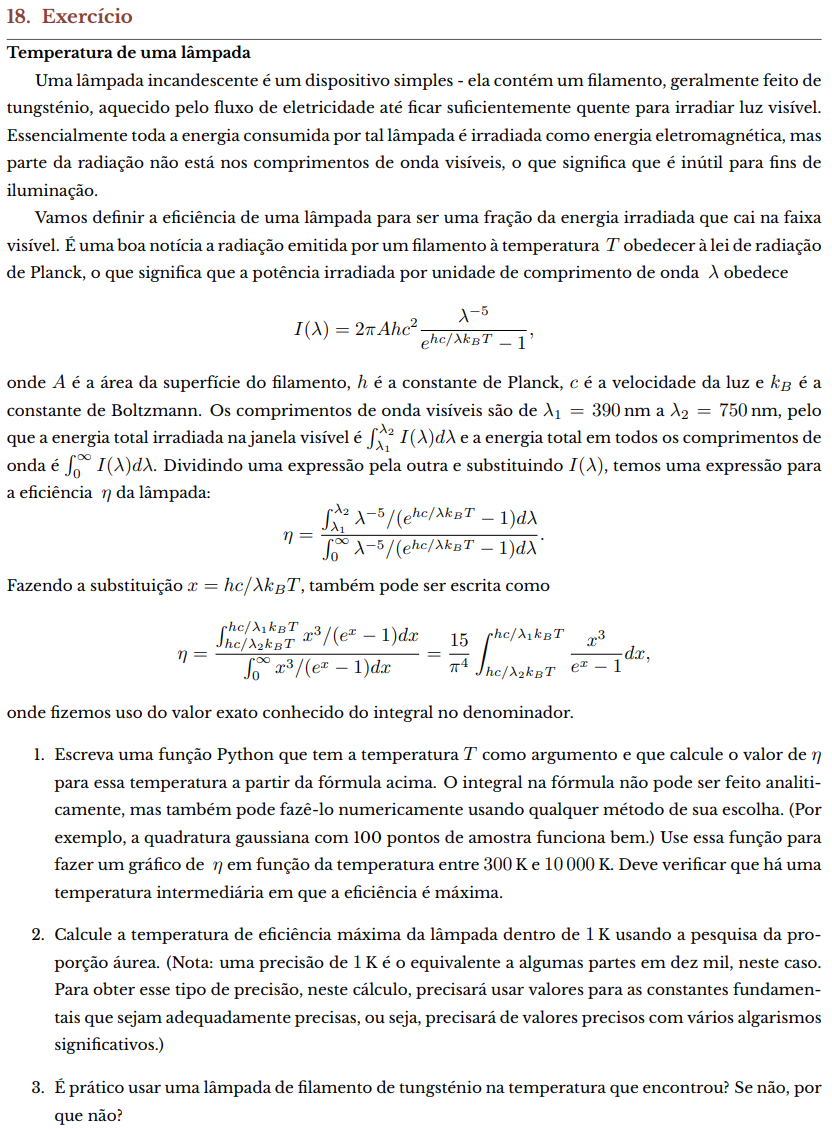

In [70]:
from typing import Callable
import numpy as np
import matplotlib.pyplot as plt

## Alínea 1

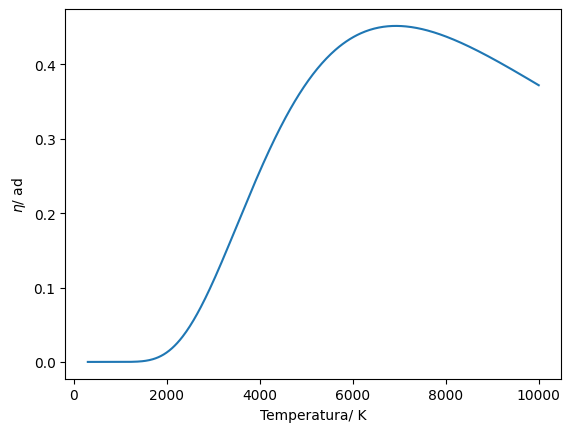

In [71]:
# Constantes (SI)
c = 299792458
h = 6.626068e-34
kb = 1.3806503e-23


def quadgausseasy(start: float, end: float, func: Callable, n: int) -> float:
    """
        Calcula o integral de `func` de `start` a `end` usando quadratura gaussiana com `n` pontos.

        ### Retorno
        Devolve o valor do integral.
    """

    # Determinar zeros e pesos
    xx, ww = np.polynomial.legendre.leggauss(n)

    # Fazer com que o integral seja de -1 a 1
    def f(x: float) -> float:
        return func((x + 1) * (end - start) / 2 + start)
    
    return  ((end - start) / 2) * np.sum(f(xx) * ww)


def eta(T: float) -> float:
    """
        Calcula a eficiência de um corpo negro na luz visível.
    """

    lambda1 = 390e-9
    lambda2 = 750e-9

    # Calcular o integral
    const = (h * c) / (kb * T)
    start = const / lambda2
    end = const / lambda1
    integral = quadgausseasy(start, end, lambda x: (x**3) / (np.exp(x) - 1), 100)

    return 15 * integral / (np.pi**4)


# Calcular os valores de eta
tt = np.linspace(300, 10000, 500)
ee = [eta(t) for t in tt]

# Representar graficamente os dados
plt.plot(tt, ee)
plt.xlabel("Temperatura/ K")
plt.ylabel("$\\eta$/ ad")
plt.show()

## Alínea 2

In [72]:
def procuraaurea(funco: Callable, x1: float, x4: float, maxi=False, eps: float=1e-6, maxI: int = 100) -> float:
    """
        Determina o extremos da função `funco(x)` no intervalo `[x1, x4]` usando o método da procura na secção áurea, terminando quando o erro for menor que `eps` fazendo no máximo `maxI` iterações.

        Determina um máximo caso `maxi=True` e determina um mínimo caso contrário.

        ### Retorno
        x: O valor x que minimiza f(x) no interalo indicado.
    """

    # Encontrar máximo ou mínimo
    if maxi:
        func = lambda x: -funco(x)
    else:
        func = lambda x: funco(x)

    # Constante de ouro
    phi = (1 + 5**0.5) / 2

    # Calcular x2 e x3 a partir de x1 e x4
    def calcx2(x1: float, x4: float) -> float:
        return x4 - (x4 - x1) / phi
    
    def calcx3(x1: float, x4: float) -> float:
        return x1 + (x4 - x1) / phi
    
    # Início do algoritmo
    x2 = calcx2(x1, x4)
    x3 = calcx3(x1, x4)

    f1, f2, f3, f4 = func(x1), func(x2), func(x3), func(x4)
    if not ((f2 < f1 and f2 < f4) or (f3 < f1 and f3 < f4)):
        raise ValueError("Não é possível este método encontrar um mínimo!")
    
    i = 0
    erro = (x4 - x1) / 2
    while abs(erro) > eps:
        
        # O mínimo está em [x1, x3]
        if f2 < f3:
            x4, f4 = x3, f3
            x3, f3 = x2, f2

            x2 = calcx2(x1, x4)
            f2 = func(x2)
        
        # O mínimo está em [x2, x4]
        else:
            x1, f1 = x2, f2
            x2, f2 = x3, f3

            x3 = calcx3(x1, x4)
            f3 = func(x3)
        
        # Calcular o erro
        erro = (x4 - x1) / 2

        # Número máximo de iterações
        i += 1
        if i > maxI:
            raise ValueError(f"Não foi possível encontrar a raíz da função com a precisão desejada com menos de maxI = {maxI} iterações!")
    
    return (x2 + x3) / 2

6928.3838787761815


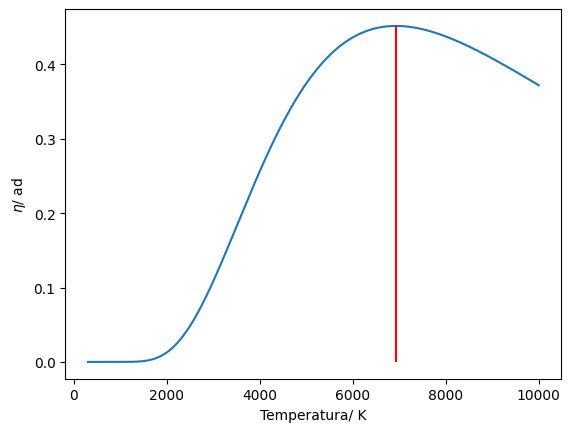

In [73]:
# Determinar o máximo de eta(T)
maxi = procuraaurea(eta, 300, 10000, maxi=True, eps=1)
print(maxi)

# Representar graficamente os dados
plt.plot(tt, ee)
plt.vlines(maxi, 0, np.max(ee), colors=["r"])
plt.xlabel("Temperatura/ K")
plt.ylabel("$\\eta$/ ad")
plt.show()

# Esta temperatura não é prática pois é mais quente que a superfície do Sol!

## Método de Gauss-Newton

Vamos repetir usando outro método para encontrar o máximo.

In [74]:
def newton(func: Callable, funcprime: Callable, x0: (float | np.ndarray), eps: float = 1e-6, maxI: int = 1000) -> (float | np.ndarray):
    """
        Resolve a equação `func(x) = 0` usando o método de Newton começando com uma estimativa `x0` e parando quando o erro for menor que `eps fazendo no máximo `maxI` iterações.
        
        A derivada de `func` é dada por `funcprime`.

        ### Argumentos
        func: Uma função que aceita um array de `N` elementos e devolve um array de `N` elementos.
        funcprime: Uma função que aceita um array de `N` elementos e devolve uma matriz `N` por `N`.
        x0: Um array de `N` elementos a usar como primeira estimativa.
        eps: Erro máximo permitido.
        maxI: Número máximo de iterações, se for ultrapassado o método levanta uma exceção.

        ### Retorno
        x: O valor x que é solução da equação.
    """

    # Número de variáveis
    N = 1 if len(np.array(x0).shape) == 0 else len(np.array(x0))
    
    # Início do algoritmo
    i = 0
    erro = eps + 1
    while abs(erro) > eps:

        if N == 1:
            # Dar um passo
            x1 = x0 - (func(x0) / funcprime(x0))

            # Calcular o erro
            erro = abs(x1 - x0)
        
        else:
            # Determinar o passo a dar
            A = funcprime(x0)
            bb = func(x0)

            dd = np.linalg.solve(A, bb)

            # Dar o passo
            x1 = x0 - dd

            # Calcular o erro
            erro = np.linalg.norm(dd)

        # Próximo passo
        x0 = x1

        # Número máximo de iterações
        i += 1
        if i > maxI:
            raise ValueError(f"Não foi possível encontrar a raíz da função com a precisão desejada com menos de maxI = {maxI} iterações!")
    
    return x0

In [75]:
def central(func: Callable, h: float = 1e-4) -> Callable:
    """
        Calcula a derivada de `func` usando a diferença central com um passo de `h`.

        ### Retorno
        Devolve uma função `fprime` que recebe como argumento `x` e devolve a derivada de `func` em `x`.
    """

    return lambda x: (func(x + h/2) - func(x - h/2)) / h


def central2(func: Callable, h: float = 1e-3) -> Callable:
    """
        Calcula a segunda derivada de `func` usando a diferença central com um passo de `h`.

        ### Retorno
        Devolve uma função `fprime` que recebe como argumento `x` e devolve a segunda derivada de `func` em `x`.
    """

    return lambda x: (func(x + h) - 2 * func(x) + func(x - h)) / (h**2)

6927.761678321679


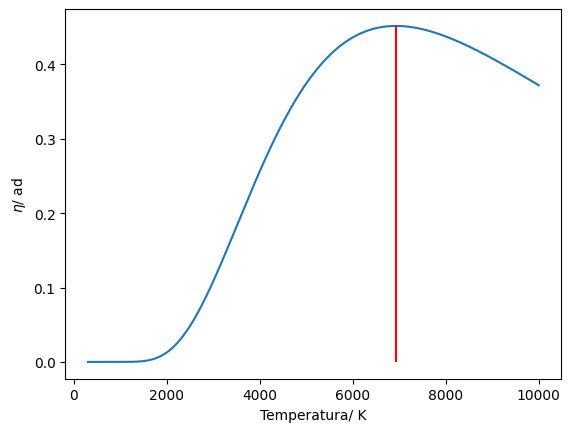

In [76]:
# Determinar o máximo de eta(T)
fprime = central(eta, h=1e-6)
fprimeprime = central2(eta, h=1e-4)
maxi = newton(fprime, fprimeprime, 5000, eps=1)
print(maxi)

# Representar graficamente os dados
plt.plot(tt, ee)
plt.vlines(maxi, 0, np.max(ee), colors=["r"])
plt.xlabel("Temperatura/ K")
plt.ylabel("$\\eta$/ ad")
plt.show()

# Esta temperatura não é prática pois é mais quente que a superfície do Sol!

## Descida do Gradiente

In [77]:
def graddescent(funcprime: Callable, x0: (float | np.ndarray), gamma: float, maxi=False, eps: float = 1e-6, maxI: int = 1000) -> (float | np.ndarray):
    """
        Determina os extremos da função cujo gradiente é `funcprime(x)` usando o método da descida do gradiente começando com uma estimativa `x0` e usando parâmetro `gamma` e parando quando o erro for menor que `eps` fazendo no máximo `maxI` iterações.

        Determina um máximo caso `maxi=True` e determina um mínimo caso contrário.

        ### Argumentos
        funcprime: Uma função que aceita um array de `N` elementos e devolve um array de `N` elementos.
        x0: Um array de `N` elementos a usar como primeira estimativa.
        gamma: Parâmetro positivo a usar como aproximação ao valor absoluto de 1/f''(x)
        eps: Erro máximo permitido.
        maxI: Número máximo de iterações, se for ultrapassado o método levanta uma exceção.

        ### Retorno
        x: O valor x que é solução da equação.
    """

    # Para determinar o máximo temos de ir no sentido do gradiente
    if maxi:
        gamma = -gamma
    
    # Início do algoritmo
    i = 0
    erro = eps + 1
    while abs(erro) > eps:
        
        # Passo a dar
        passo = gamma * funcprime(x0)

        # Dar o passo
        x1 = x0 - passo

        # Calcular o erro
        erro = np.linalg.norm(passo)

        # Próximo passo
        x0 = x1

        # Número máximo de iterações
        i += 1
        if i > maxI:
            raise ValueError(f"Não foi possível encontrar o extremo da função com a precisão desejada com menos de maxI = {maxI} iterações!")
    
    return x0

Determinar $\gamma$:

- Sabemos que $(x^2)'' = 2$.
- Junto do máximo esta função é da aproximadamente da forma $(-(x/1000)^2)$ cuja segunda derivada é $-1/500000$

Logo $\gamma = 1/f''(x)$ será da ordem de $500000$.

6875.542538469894


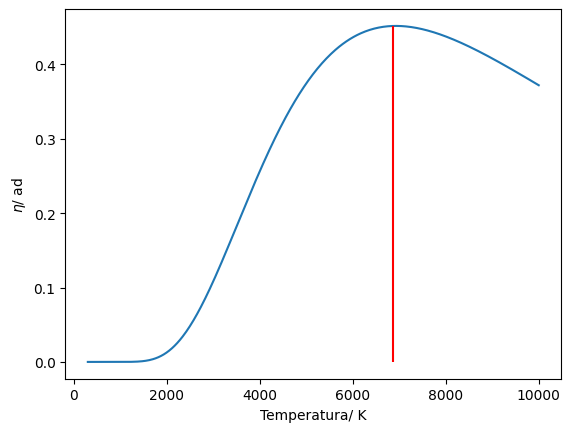

In [83]:
# Determinar o máximo de eta(T)
fprime = central(eta, h=1e-6)
maxi = graddescent(fprime, 6000, 600000, maxi=True, eps=1, maxI=1000)
print(maxi)

# Representar graficamente os dados
plt.plot(tt, ee)
plt.vlines(maxi, 0, np.max(ee), colors=["r"])
plt.xlabel("Temperatura/ K")
plt.ylabel("$\\eta$/ ad")
plt.show()

# Esta temperatura não é prática pois é mais quente que a superfície do Sol!

### Descida do Gradiente Aproximada

In [81]:
def graddescentapp(func: Callable, x0: float, x1: float, gamma: float, maxi=False, eps: float = 1e-6, maxI: int = 1000) -> float:
    """
        Determina os extremos da função `func(x)` usando o método da descida do gradiente começando com uma estimativa `x0` e usando parâmetro `gamma` e parando quando o erro for menor que `eps` fazendo no máximo `maxI` iterações.

        Determina um máximo caso `maxi=True` e determina um mínimo caso contrário.

        ### Argumentos
        funcprime: Uma função que aceita um float e devolve um float.
        x0: Float a usar como primeira estimativa.
        x1: Float a usar como segunda estimativa.
        gamma: Parâmetro positivo a usar como aproximação ao valor absoluto de 1/f''(x)
        eps: Erro máximo permitido.
        maxI: Número máximo de iterações, se for ultrapassado o método levanta uma exceção.

        ### Retorno
        x: O valor x que é solução da equação.
    """

    # Para determinar o máximo temos de ir no sentido do gradiente
    if maxi:
        gamma = -gamma
    
    # Início do algoritmo
    i = 0
    erro = eps + 1
    while abs(erro) > eps:
        
        # Passo a dar
        passo = gamma * (func(x1) - func(x0)) / (x1 - x0)

        # Dar o passo
        x2 = x0 - passo

        # Calcular o erro
        erro = abs(passo)

        # Próximo passo
        x0 = x1
        x1 = x2

        # Número máximo de iterações
        i += 1
        if i > maxI:
            raise ValueError(f"Não foi possível encontrar o extremo da função com a precisão desejada com menos de maxI = {maxI} iterações!")
    
    return x1

6407.30724811924


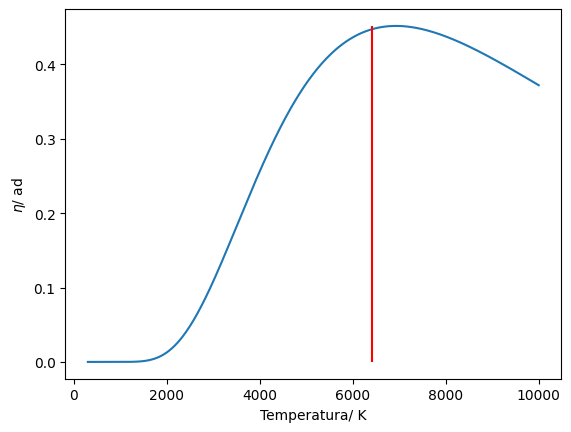

In [84]:
# Determinar o máximo de eta(T)
maxi = graddescentapp(eta, 5000, 6000, 600000, maxi=True, eps=1, maxI=1000)
print(maxi)

# Representar graficamente os dados
plt.plot(tt, ee)
plt.vlines(maxi, 0, np.max(ee), colors=["r"])
plt.xlabel("Temperatura/ K")
plt.ylabel("$\\eta$/ ad")
plt.show()

# Esta temperatura não é prática pois é mais quente que a superfície do Sol!